In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [98]:
#  Load and Explore the dataset
data = pd.read_csv('Covid_Data.csv')

data.head()



,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [102]:
data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [104]:
# data PReprocessing >........Handling Missing Valuess
data.replace([97,99] , np.nan, inplace= True)

In [106]:
# in this step we have to impute the missing values with the most frequent Values for catgerial variable
imputer = SimpleImputer(strategy= 'most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [107]:
#  in the next step ,Converting the categrial variable and creating the target varibale
# form this dataset .....convert the 'sex', classification and other catgiral columns to numerical using one-Hot encoding

# data_encoded = pd.get_dummies(data_imputed, columns=['sex', 'classification', 'medical unit'])

# data_encoded['high_risk'] = np.where(
#     (data_encoded['intubed'] == 1) | 
#     (data_encoded['icu'] == 1) | 
#     (data_encoded['date died'] != '9999-99-99'), 1, 0
# )

# data_encoded.drop(['intubed', 'icu', 'date died'], axis=1, inplace=True)
# print(data_imputed.columns)
# Correctly apply one-hot encoding to available categorical columns
data_encoded = pd.get_dummies(data_imputed, columns=['SEX', 'CLASIFFICATION_FINAL', 'MEDICAL_UNIT']) 

# Target Varible
data_encoded['high_risk'] = np.where(
    (data_encoded['INTUBED']==1) |
    (data_encoded['ICU'] == 1) |
    (data_encoded['DATE_DIED'] != '9999-99-99'), 1, 0
)

# Dropping the columns that are not need for prediction 
data_encoded.drop(['INTUBED', 'ICU', 'DATE_DIED'], axis=1, inplace=True)

data_encoded.head()







,USMER,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,...,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,high_risk
0,2,1,1.0,65.0,2.0,2,2,2,2,1,...,False,False,False,False,False,False,False,False,False,1
1,2,1,1.0,72.0,2.0,2,2,2,2,1,...,False,False,False,False,False,False,False,False,False,1
2,2,2,2.0,55.0,2.0,1,2,2,2,2,...,False,False,False,False,False,False,False,False,False,1
3,2,1,2.0,53.0,2.0,2,2,2,2,2,...,False,False,False,False,False,False,False,False,False,1
4,2,1,2.0,68.0,2.0,1,2,2,2,1,...,False,False,False,False,False,False,False,False,False,1


In [110]:
# seperate feature and target varible
X = data_encoded.drop('high_risk',axis =1)
y = data_encoded['high_risk']

In [112]:
# spliting the data into train  and test 
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

In [114]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

In [116]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [118]:
y_predict = model.predict(X_test)

In [122]:
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_predict))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))


Accuracy: 0.9262
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    287902
           1       0.57      0.51      0.54     26671

    accuracy                           0.93    314573
   macro avg       0.76      0.74      0.75    314573
weighted avg       0.92      0.93      0.92    314573

Confusion Matrix:
[[277645  10257]
 [ 12952  13719]]


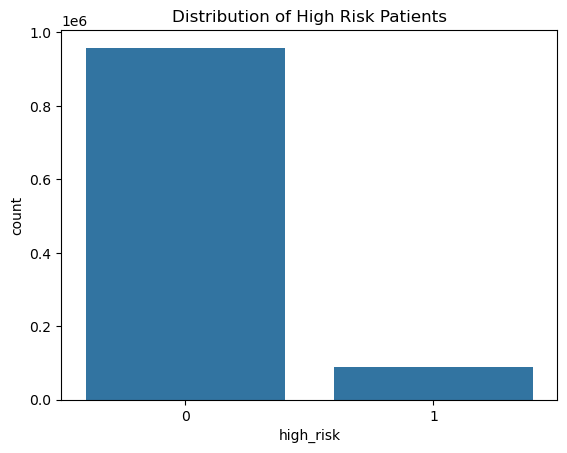

In [124]:
# Visualizations

# 1. Distribution of the target variable 'high_risk'
sns.countplot(x='high_risk', data=data_encoded)
plt.title('Distribution of High Risk Patients')
plt.show()

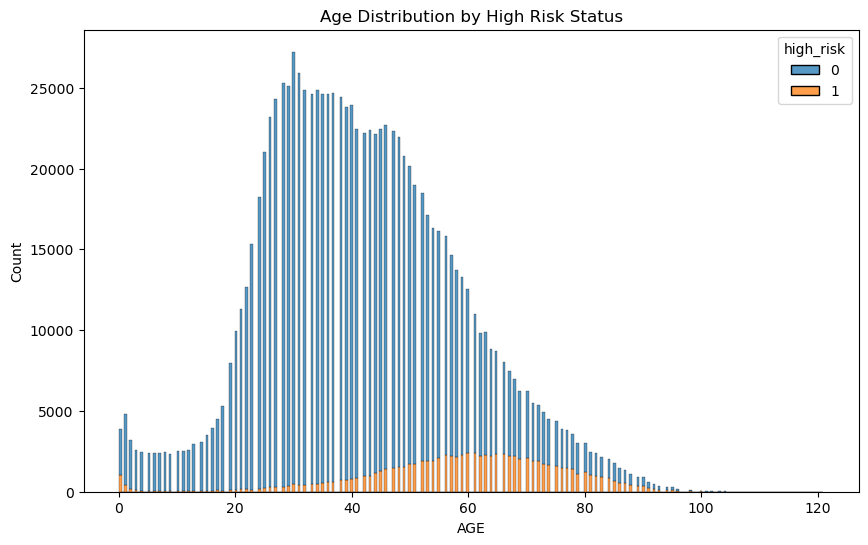

In [126]:
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded, x='AGE', hue='high_risk', multiple='stack')
plt.title('Age Distribution by High Risk Status')
plt.show()


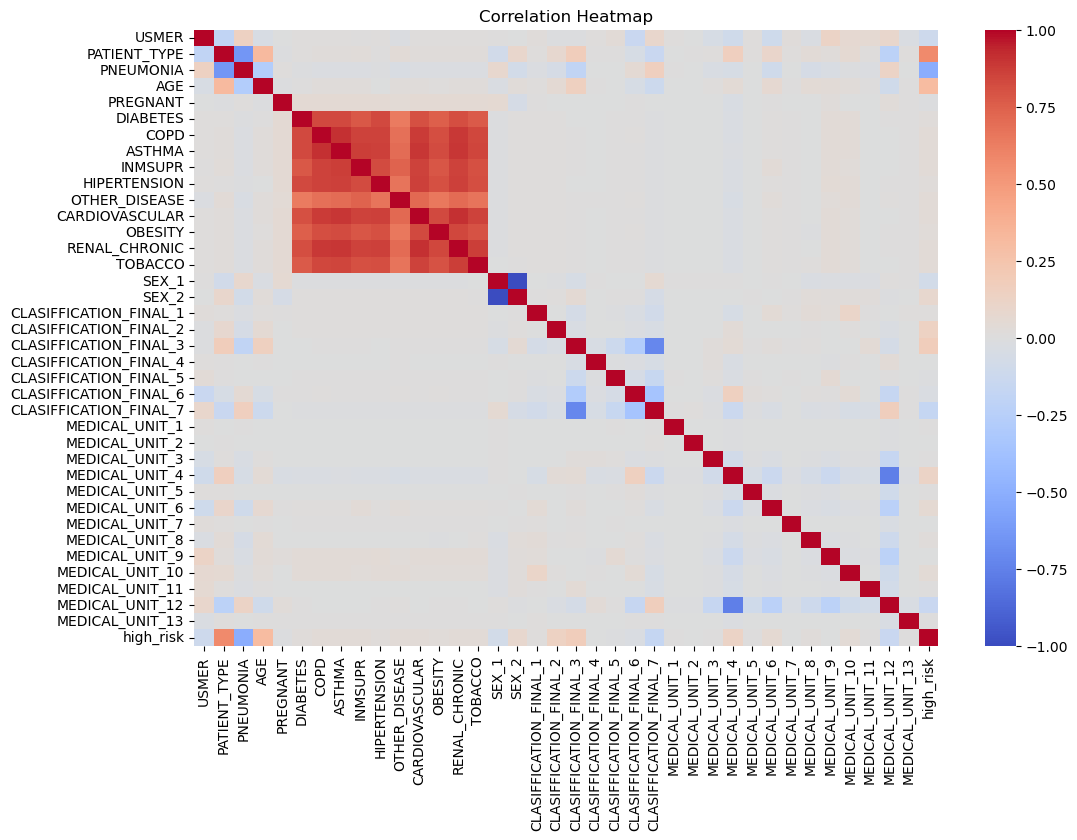

In [128]:
plt.figure(figsize=(12, 8))
corr = data_encoded.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

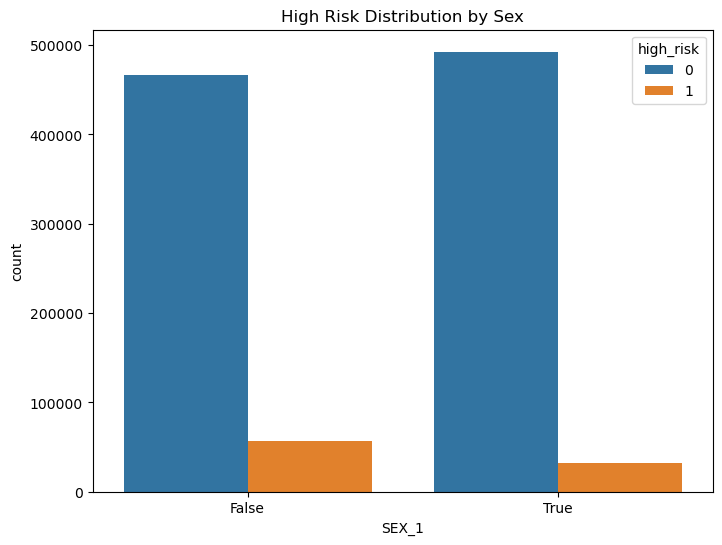

In [130]:
# 4. High risk distribution by sex
plt.figure(figsize=(8, 6))
sns.countplot(x='SEX_1', hue='high_risk', data=data_encoded)
plt.title('High Risk Distribution by Sex')
plt.show()


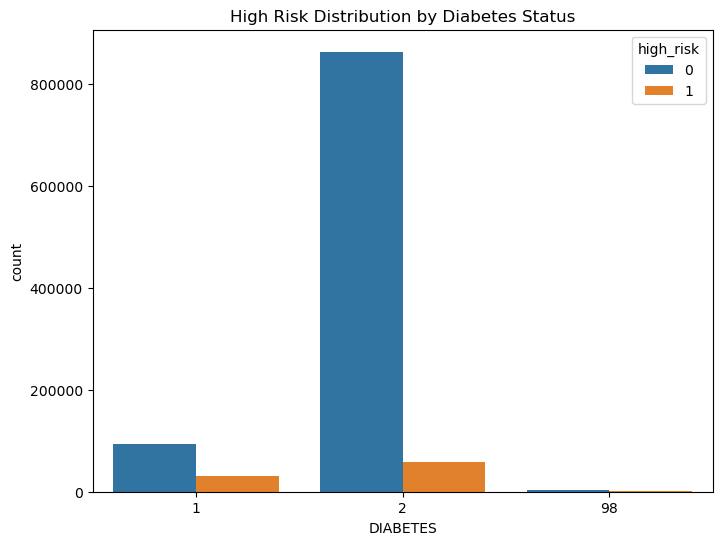

In [132]:
# 5. High risk distribution by diabetes status
plt.figure(figsize=(8, 6))
sns.countplot(x='DIABETES', hue='high_risk', data=data_encoded)
plt.title('High Risk Distribution by Diabetes Status')
plt.show()